In [1]:
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

In [3]:
#load data
train = pd.read_csv('train.csv', sep=",")
test = pd.read_csv('test.csv', sep=",")
item = pd.read_csv('item_data.csv', sep=",")
view_log = pd.read_csv('view_log.csv', sep=",")

In [4]:
train.shape

(237609, 7)

In [5]:
train.describe()

,user_id,app_code,is_4G,is_click
count,237609.000000,237609.000000,237609.000000,237609.000000
mean,46454.526828,249.099971,0.361312,0.045714
std,26802.726666,135.213609,0.480382,0.208864
min,0.000000,0.000000,0.000000,0.000000
25%,23197.000000,163.000000,0.000000,0.000000
50%,46597.000000,213.000000,0.000000,0.000000
75%,69684.000000,385.000000,1.000000,0.000000
max,92586.000000,522.000000,1.000000,1.000000


In [6]:
train.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0


In [7]:
test.shape

(90675, 6)

In [8]:
test.describe()

,user_id,app_code,is_4G
count,90675.00000,90675.000000,90675.000000
mean,46417.71013,254.793703,0.357872
std,26835.33356,133.411434,0.479377
min,1.00000,0.000000,0.000000
25%,23029.00000,190.000000,0.000000
50%,46557.00000,213.000000,0.000000
75%,69764.50000,386.000000,1.000000
max,92586.00000,522.000000,1.000000


In [9]:
test.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,latest,1
3,39c4b4dc0e9701b55a0a4f072008fb3f,2018-12-13 07:47:00,22988,207,latest,1
4,bf5a572cca75f5fc67f4b14e58b11d70,2018-12-13 07:48:00,35431,242,latest,1


In [10]:
item.shape

(132761, 6)

In [11]:
item.head()

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619
3,8777,2355,13,58,189,5264
4,113705,1267,17,39,151,10239


In [12]:
item.describe()

,item_id,item_price,category_1,category_2,category_3,product_type
count,132761.000000,1.327610e+05,132761.000000,132761.000000,132761.000000,132761.000000
mean,66430.268460,1.082685e+04,9.373852,39.130196,169.060929,5303.063746
std,38354.112949,2.843019e+04,5.193278,21.443609,95.310870,2961.645034
min,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,33211.000000,1.324000e+03,6.000000,24.000000,85.000000,2874.000000
50%,66433.000000,2.944000e+03,9.000000,40.000000,159.000000,5225.000000
75%,99644.000000,8.544000e+03,13.000000,57.000000,255.000000,7844.000000
max,132865.000000,1.340800e+06,17.000000,79.000000,341.000000,10584.000000


In [13]:
view_log.shape

(3118622, 5)

In [14]:
view_log.describe()

,session_id,user_id,item_id
count,3.118622e+06,3.118622e+06,3.118622e+06
mean,5.451129e+05,4.617972e+04,6.605151e+04
std,3.147682e+05,2.672813e+04,3.826626e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.726422e+05,2.312200e+04,3.321900e+04
50%,5.454915e+05,4.617700e+04,6.747900e+04
75%,8.175090e+05,6.933900e+04,9.927000e+04
max,1.089677e+06,9.258600e+04,1.328650e+05


In [15]:
view_log.head()

,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
1,2018-10-15 08:58:00,android,503590,74788,7640
2,2018-10-15 08:58:00,android,573960,23628,128855
3,2018-10-15 08:58:00,android,121691,2430,12774
4,2018-10-15 08:58:00,android,218564,19227,28296


In [16]:
train.impression_time.unique()

array(['2018-11-15 00:00:00', '2018-11-15 00:01:00',
       '2018-11-15 00:02:00', ..., '2018-12-13 07:41:00',
       '2018-12-13 07:42:00', '2018-12-13 07:43:00'], dtype=object)

In [17]:
train.impression_id.unique()

array(['c4ca4238a0b923820dcc509a6f75849b',
       '45c48cce2e2d7fbdea1afc51c7c6ad26',
       '70efdf2ec9b086079795c442636b55fb', ...,
       '8e58582b20ebfacb84fc338bac7cd5ae',
       '9ccc5e0a6dc7a2f5224890a22defbd00',
       'a68c052cab131719dede538b5466428e'], dtype=object)

In [18]:
train.user_id.unique()

array([87862, 63410, 71748, ..., 89765, 43386,  2699])

In [21]:
train.app_code.unique()

array([422, 467, 259, 244, 473, 409, 190, 481, 386, 385, 249, 508, 275,
       371, 207, 499, 372, 469, 283, 296,   7, 482, 359, 202, 129, 242,
       127, 261, 163, 491, 198,  32, 366, 256, 465, 369, 407, 318,   3,
         5, 377, 260, 500, 438,  46,  41, 317, 463, 145, 291, 151, 340,
       168, 410, 213, 375, 171, 393, 150, 349,  37, 391, 414,  38,  44,
       144, 443, 444, 272, 434, 440, 169, 351, 250,  93, 231, 392, 362,
       354,  40, 170, 383,  23,  82, 424, 436, 382, 319, 107, 496, 365,
       320, 173, 403, 195, 507,   1, 300,  20,  35,  98, 178, 264, 240,
       126,  47, 166, 290, 294, 177,  96, 421, 327, 390, 448, 175, 346,
       325,   8,  87,  61, 194, 417, 389, 135,  58, 201, 268,  49, 133,
       196, 399, 492, 289, 193, 368, 330, 398, 334, 302, 217, 139, 395,
       218, 338,  77, 106, 243,   2,  50, 210, 215, 308,  97, 367, 478,
       470, 430,  16,  15, 336, 278, 495, 405, 276, 397, 455,  34, 423,
       214, 314, 342, 120, 427, 229, 442, 420, 388, 483,  14,  4

In [19]:
train.os_version.unique()

array(['old', 'latest', 'intermediate'], dtype=object)

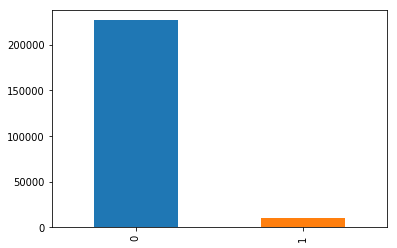

In [20]:
pd.value_counts(train['is_click']).plot.bar()

In [21]:
#drop user_id and impression in train
train = train.drop(['impression_id','user_id'], axis=1)
test = test.drop(['user_id'], axis=1)

In [31]:
#generate day of week
#train['day_of_week'] = train.apply(lambda row: dow(row.impression_time), axis=1)
#train['weekday'] = train['impression_time'].dt.dayofweek

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
#generate hour

In [ ]:
#split categorical data

In [ ]:
#combine data

In [ ]:
#fix imbalance

In [ ]:
#store test impression id in a different data frame

In [ ]:
#perform modeling

In [ ]:
#generate metrics